## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
read_data=pd.read_csv('Predicting heart disease.csv')

In [3]:
read_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## ML Model

### 1) Logistic Regression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [5]:
x = read_data.iloc[:,:-1]

y = read_data.iloc[:,-1:]


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30,random_state = 0)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212, 1)
(91, 1)


In [13]:
lor = LogisticRegression(max_iter=900)

In [14]:
lor.fit(x_train,y_train)

C:\Users\Ishan Srivastava\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=900,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = lor.predict(x_test)

In [16]:
score = accuracy_score(y_pred,y_test)
print(score)

0.8131868131868132


In [17]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("Accuracy Score: {0}".format(score), size=15)

## confusion Matrix

In [18]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[32, 12],
       [ 5, 42]], dtype=int64)

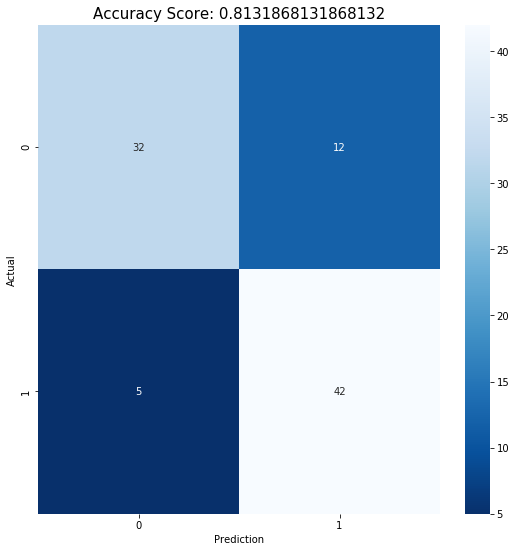

In [19]:
print_heatmap(cm, score)

## Accuracy for Logistic Regression model is 81.31%

## 2) Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier(max_depth=10)
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
dtree_y_pred = dtree.predict(x_test)

In [24]:
dtree_accuracy_score = accuracy_score(y_test,dtree_y_pred)

dtree_accuracy_score

0.7142857142857143

## Confusion Matrix

In [25]:
cf_dtree = confusion_matrix(y_test, dtree_y_pred)
cf_dtree

array([[32, 12],
       [14, 33]], dtype=int64)

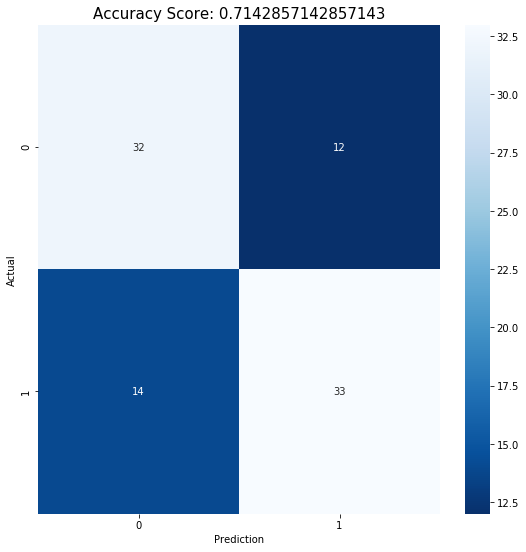

In [26]:
print_heatmap(cf_dtree,dtree_accuracy_score)

## Accurracy for Decision tree model is  71.42%

## KNN Classifiers

In [27]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(x_train, y_train, x_test, y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
print(y_pred_knn)

Train accuracy: 72.17%
Test accuracy: 70.33%
[0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1]


C:\Users\Ishan Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\Ishan Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [29]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 70.33 %


In [30]:
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(x_train, y_train, x_test, y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 54.95%
n_neigbors = 2
Train accuracy: 79.72%
Test accuracy: 64.84%
n_neigbors = 3
Train accuracy: 76.42%
Test accuracy: 67.03%
n_neigbors = 4
Train accuracy: 74.53%
Test accuracy: 68.13%
n_neigbors = 5
Train accuracy: 77.83%
Test accuracy: 67.03%
n_neigbors = 6
Train accuracy: 74.06%
Test accuracy: 68.13%
n_neigbors = 7
Train accuracy: 70.28%
Test accuracy: 69.23%
n_neigbors = 8


C:\Users\Ishan Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\Ishan Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\Ishan Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\Ishan Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Train accuracy: 72.17%
Test accuracy: 70.33%
n_neigbors = 9
Train accuracy: 72.17%
Test accuracy: 70.33%


C:\Users\Ishan Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


## Confusion matrix

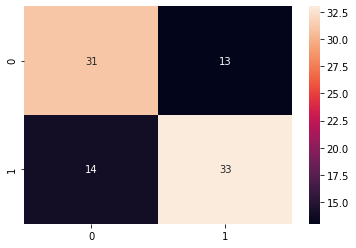

In [31]:
matrix= confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix,annot = True, fmt = "d")

## Accuracy for KNN model is 70.33%

## Selecting Best Model

In [32]:
from sklearn.metrics import classification_report
target_names = ["Not Having Heart Disease","Having Heart Disease"]

lr_report = classification_report(y_test,y_pred,target_names=target_names)

dtree_report = classification_report(y_test,dtree_y_pred,target_names=target_names)

KNN_report = classification_report(y_test,y_pred_knn,target_names=target_names)


In [33]:
print("=====================Classification Report Of Logistic Regression========================\n\n",lr_report)
print("=====================Classification Report Of Decision Tree===============================\n\n",dtree_report)
print("======================Classification Report Of KNN===============================\n\n",KNN_report)

=====================Classification Report Of Logistic Regression========================

                           precision    recall  f1-score   support

Not Having Heart Disease       0.86      0.73      0.79        44
    Having Heart Disease       0.78      0.89      0.83        47

                accuracy                           0.81        91
               macro avg       0.82      0.81      0.81        91
            weighted avg       0.82      0.81      0.81        91

=====================Classification Report Of Decision Tree===============================

                           precision    recall  f1-score   support

Not Having Heart Disease       0.70      0.73      0.71        44
    Having Heart Disease       0.73      0.70      0.72        47

                accuracy                           0.71        91
               macro avg       0.71      0.71      0.71        91
            weighted avg       0.72      0.71      0.71        91

=================

In [34]:
#Accuracies of all classifiers
print("Logistic Regression Classifier : ",score*100,"%")
print("Decision Tree Classifier : ", dtree_accuracy_score*100,"%")
print("KNN : ",score_knn,"%")

Logistic Regression Classifier :  81.31868131868131 %
Decision Tree Classifier :  71.42857142857143 %
KNN :  70.33 %


## Precision,Recall and F1 scores for all classifiers

In [35]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [36]:
recall_lr = recall_score(y_test,y_pred)
recall_dtree = recall_score(y_test,dtree_y_pred)
recall_knn = recall_score(y_test, y_pred_knn)
recalls = []
recalls.append(recall_lr)
recalls.append(recall_dtree)
recalls.append(recall_knn)
print("Recall score for Logistic Regression is: ",recall_lr)
print("Recall score for Decision Tree is: ",recall_dtree)
print("Recall score for KNN is: ",recall_knn)

Recall score for Logistic Regression is:  0.8936170212765957
Recall score for Decision Tree is:  0.7021276595744681
Recall score for KNN is:  0.7021276595744681


In [37]:
pre_lr = precision_score(y_test,y_pred)
pre_dtree = precision_score(y_test,dtree_y_pred)
pre_knn = precision_score(y_test,y_pred_knn)
precisions = []
precisions.append(pre_lr)
precisions.append(pre_dtree)
precisions.append(pre_knn)
print("Precision score for Logistic Regression is: ",pre_lr)
print("Precision score for Decision Tree is: ",pre_dtree)
print("Precision score for KNN is: ",pre_knn)

Precision score for Logistic Regression is:  0.7777777777777778
Precision score for Decision Tree is:  0.7333333333333333
Precision score for KNN is:  0.717391304347826


In [38]:
f1_lr = f1_score(y_test,y_pred)
f1_dtree = f1_score(y_test,dtree_y_pred)
f1_knn = f1_score(y_test,y_pred_knn)
f1s = []

f1s.append(f1_lr)
f1s.append(f1_dtree)
f1s.append(f1_knn)
f1s
print("F1 score for Logistic Regression is: ",f1_lr)
print("F1 score for Decision Tree is: ",f1_dtree)
print("F1 score for KNN is: ",f1_knn)

F1 score for Logistic Regression is:  0.8316831683168316
F1 score for Decision Tree is:  0.7173913043478262
F1 score for KNN is:  0.7096774193548387


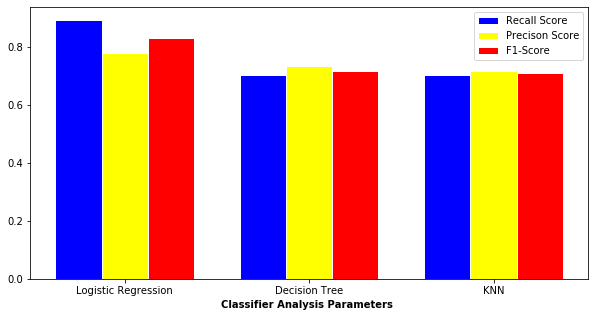

In [39]:
plt.figure(figsize=(10,5))
barWidth = 0.25
classifiers = ["Logistic Regression","Decision Tree","KNN"]

r1 = np.arange(len(recalls))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, recalls, color='blue', width=barWidth, edgecolor='white', label='Recall Score')
plt.bar(r2, precisions, color='yellow', width=barWidth, edgecolor='white', label='Precison Score')
plt.bar(r3, f1s, color='red', width=barWidth, edgecolor='white', label='F1-Score')

plt.xlabel('Classifier Analysis Parameters ', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(recalls))], classifiers)
 
plt.legend()


plt.show()


# Conclusion 

## As the accuracy of the Logistic Regression is better than the decison tree and the KNN  hence for this example Logistic Regression is the Best Classifier